In [85]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [86]:
#url = "D:\\TUGAS AKHIR\\Data TA\\data3.csv"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','y']

#url = "D:\\TUGAS AKHIR\\Data TA\\Australian fraud dataset\\australian.csv"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']

url = "D:\\TUGAS AKHIR\\Data TA\\German fraud dataset\\german.csv"
colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','y']

data = pd.read_csv(url, header = None, names = colnames)
#data = data.sample(n=10000, random_state = 42)
data["y"].value_counts()

1    700
2    300
Name: y, dtype: int64

In [79]:
#X = data.drop('y', axis = 1)
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#y = data['y']
#pca = PCA(0.85)
#pca.fit(X)
#print(pca.n_components_)

16


D:\CONDA\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\CONDA\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [80]:
#X = pca.transform(X)
#colnames1 = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16']
#X = pd.DataFrame(data = data, columns = colnames1)
#print(X)

     x1  x2  x3   x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x16
0     1   6   4   12   5   5   3   4   1   67    3    2    1    2    1    0
1     2  48   2   60   1   3   2   2   1   22    3    1    1    1    1    0
2     4  12   4   21   1   4   3   3   1   49    3    1    2    1    1    0
3     1  42   2   79   1   4   3   4   2   45    3    1    2    1    1    0
4     1  24   3   49   1   3   3   4   4   53    3    2    2    1    1    1
5     4  36   2   91   5   3   3   4   4   35    3    1    2    2    1    0
6     4  24   2   28   3   5   3   4   2   53    3    1    1    1    1    0
7     2  36   2   69   1   3   3   2   3   35    3    1    1    2    1    0
8     4  12   2   31   4   4   1   4   1   61    3    1    1    1    1    0
9     2  30   4   52   1   1   4   2   3   28    3    2    1    1    1    1
10    2  12   2   13   1   2   2   1   3   25    3    1    1    1    1    1
11    1  48   2   43   1   2   2   4   2   24    3    1    1    1    1    0
12    2  12 

In [87]:
#################### I N P U T ####################
#berdasarkan buku
#khi = 0.729
#c1 = 2.05
#c2 = 2.05

#berdasarkan paper
K = 0.3
c1 = 2.05
c2 = 2.05
c = c1 + c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = 10
n_particles = 100

In [88]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    scores = cross_val_score(svclassifier, X, y, cv = kf, scoring = 'roc_auc')
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([-1,11,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

for i in range(n_particles):
    max_velocity = np.array([10,10])
    min_velocity = np.array([-10,-10])
    max_position = np.array([10,10])
    min_position = np.array([0.0001, 0.001])

def eval_velocity(new_velocity):
    for j in range(0,2):
        if(new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0,2):
        if(particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif(particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector
        

In [89]:
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.random()*2,(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
#velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


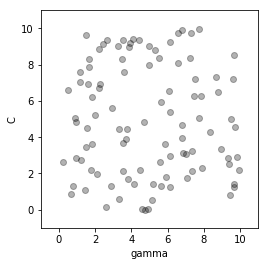

AUC for particle - 1 is 0.5068576256290366  At (gamma, c):  [3.54200629 3.70399339] .. Time =  0.4179859161376953
AUC for particle - 2 is 0.5311556353934267  At (gamma, c):  [2.28739776 6.90874017] .. Time =  0.40900111198425293
AUC for particle - 3 is 0.5035380280421909  At (gamma, c):  [9.6631684  1.42176521] .. Time =  0.4269981384277344
AUC for particle - 4 is 0.506372821203932  At (gamma, c):  [7.3365979  3.25492441] .. Time =  0.4929842948913574
AUC for particle - 5 is 0.5060606473472447  At (gamma, c):  [5.60891297 5.94375622] .. Time =  0.44300055503845215
AUC for particle - 6 is 0.5502597607680985  At (gamma, c):  [1.64539203 7.9011893 ] .. Time =  0.4210069179534912
AUC for particle - 7 is 0.538624019389458  At (gamma, c):  [2.42803122 9.12903144] .. Time =  0.40600132942199707
AUC for particle - 8 is 0.5040078829955853  At (gamma, c):  [5.10985727 0.53839537] .. Time =  0.4009871482849121
AUC for particle - 9 is 0.5082426545789496  At (gamma, c):  [4.71601797 4.85169409] .. 

AUC for particle - 73 is 0.5076488206898433  At (gamma, c):  [3.45880711 8.34188282] .. Time =  0.42100024223327637
AUC for particle - 74 is 0.5060606473472447  At (gamma, c):  [5.56631654 2.630713  ] .. Time =  0.42298126220703125
AUC for particle - 75 is 0.5109475478801938  At (gamma, c):  [4.44772171 2.17822424] .. Time =  0.4229862689971924
AUC for particle - 76 is 0.5068924767435602  At (gamma, c):  [3.51690792 2.13785025] .. Time =  0.4209933280944824
AUC for particle - 77 is 0.5049299681568009  At (gamma, c):  [9.3589811  2.49753974] .. Time =  0.4429893493652344
AUC for particle - 78 is 0.510326205780411  At (gamma, c):  [4.15000641 1.42940209] .. Time =  0.4399983882904053
AUC for particle - 79 is 0.5060606473472447  At (gamma, c):  [5.85365122 3.63329534] .. Time =  0.4309964179992676
AUC for particle - 80 is 0.5193139648497948  At (gamma, c):  [2.6042653  0.17531022] .. Time =  0.4609858989715576
AUC for particle - 81 is 0.506372821203932  At (gamma, c):  [7.43589197 6.26287

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 1 is [0.22188238 2.64338834] with AUC: 0.5995607229583028
43.63339924812317


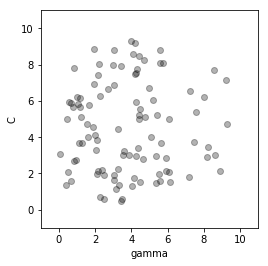

AUC for particle - 1 is 0.5410951914562074  At (gamma, c):  [2.03203401 3.31201627] .. Time =  0.3989894390106201
AUC for particle - 2 is 0.5398275503367251  At (gamma, c):  [1.93167672 6.95659982] .. Time =  0.4039943218231201
AUC for particle - 3 is 0.506372821203932  At (gamma, c):  [7.18639504 1.82956744] .. Time =  0.42598581314086914
AUC for particle - 4 is 0.5109475478801938  At (gamma, c):  [4.38307079 3.39589172] .. Time =  0.42198801040649414
AUC for particle - 5 is 0.5082201967995749  At (gamma, c):  [4.74607671 5.12021131] .. Time =  0.42002177238464355
AUC for particle - 6 is 0.5803039014658737  At (gamma, c):  [1.07193674 5.8501043 ] .. Time =  0.3690032958984375
AUC for particle - 7 is 0.5399724329565951  At (gamma, c):  [1.94811375 8.88610096] .. Time =  0.4071526527404785
AUC for particle - 8 is 0.5127784355114381  At (gamma, c):  [3.30628381 1.37754311] .. Time =  0.4179987907409668
AUC for particle - 9 is 0.5109475478801938  At (gamma, c):  [4.41827345 4.99059956] ..

AUC for particle - 73 is 0.513092232863117  At (gamma, c):  [3.42021438 7.95601241] .. Time =  0.4160034656524658
AUC for particle - 74 is 0.5052521872565655  At (gamma, c):  [3.59727443 3.25228678] .. Time =  0.4429929256439209
AUC for particle - 75 is 0.5128121028245172  At (gamma, c):  [3.28547382 2.25261649] .. Time =  0.44799065589904785
AUC for particle - 76 is 0.5123655658806815  At (gamma, c):  [3.01359072 1.90827296] .. Time =  0.4479997158050537
AUC for particle - 77 is 0.5049299681568009  At (gamma, c):  [8.87759    2.13175844] .. Time =  0.4619877338409424
AUC for particle - 78 is 0.539009991331206  At (gamma, c):  [2.37989536 2.18849128] .. Time =  0.4309978485107422
AUC for particle - 79 is 0.5068576256290366  At (gamma, c):  [3.53483887 3.04450114] .. Time =  0.4500010013580322
AUC for particle - 80 is 0.5374049488478002  At (gamma, c):  [2.50194357 0.58336919] .. Time =  0.40898919105529785
AUC for particle - 81 is 0.5109475478801938  At (gamma, c):  [4.4933127  5.57194

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 2 is [0.05164668 3.06299392] with AUC: 0.6533888391741217
43.17100667953491


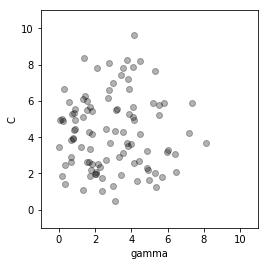

AUC for particle - 1 is 0.5421595397054629  At (gamma, c):  [1.69382622 3.35488395] .. Time =  0.4099740982055664
AUC for particle - 2 is 0.580166611803766  At (gamma, c):  [0.88025775 5.56281783] .. Time =  0.3650016784667969
AUC for particle - 3 is 0.5039876826077379  At (gamma, c):  [4.83770486 2.30461378] .. Time =  0.4350011348724365
AUC for particle - 4 is 0.5192993141231188  At (gamma, c):  [2.81422059 3.66694677] .. Time =  0.43533802032470703
AUC for particle - 5 is 0.5068912929421157  At (gamma, c):  [3.50791645 4.28150272] .. Time =  0.4269993305206299
AUC for particle - 6 is 0.5835085426543221  At (gamma, c):  [0.83105695 5.30959755] .. Time =  0.3629903793334961
AUC for particle - 7 is 0.5708405516150036  At (gamma, c):  [1.37551886 8.34970195] .. Time =  0.3819899559020996
AUC for particle - 8 is 0.5387026867344312  At (gamma, c):  [1.78953555 2.18766845] .. Time =  0.4179844856262207
AUC for particle - 9 is 0.5102812902216615  At (gamma, c):  [4.08580068 5.11565508] .. T

AUC for particle - 73 is 0.5068778260168841  At (gamma, c):  [3.53237689 7.84000987] .. Time =  0.5779805183410645
AUC for particle - 74 is 0.5092688933527391  At (gamma, c):  [3.77417895 3.70246782] .. Time =  0.4699873924255371
AUC for particle - 75 is 0.5575701397592705  At (gamma, c):  [1.57532616 2.65837787] .. Time =  0.49197936058044434
AUC for particle - 76 is 0.5410369308233802  At (gamma, c):  [2.02902569 2.07873311] .. Time =  0.4906141757965088
AUC for particle - 77 is 0.506372821203932  At (gamma, c):  [6.47475399 2.06831394] .. Time =  0.42150211334228516
AUC for particle - 78 is 0.5388045501969737  At (gamma, c):  [1.80539301 2.50369091] .. Time =  0.38570237159729004
AUC for particle - 79 is 0.5374232129703609  At (gamma, c):  [2.58006453 2.74267895] .. Time =  0.3937380313873291
AUC for particle - 80 is 0.5386183595169252  At (gamma, c):  [2.35727609 1.05397542] .. Time =  0.37012767791748047
AUC for particle - 81 is 0.5128340789145313  At (gamma, c):  [3.22897005 5.58

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


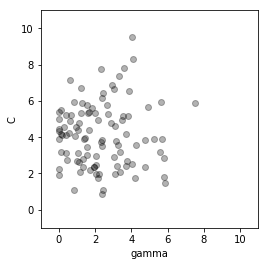

AUC for particle - 1 is 0.5624838631078073  At (gamma, c):  [1.53475933 3.44709788] .. Time =  0.40206170082092285
AUC for particle - 2 is 0.590285853932408  At (gamma, c):  [0.38825272 5.24743393] .. Time =  0.36876440048217773
AUC for particle - 3 is 0.5102812902216615  At (gamma, c):  [4.01553217 2.54408478] .. Time =  0.4424755573272705
AUC for particle - 4 is 0.5664961614011861  At (gamma, c):  [1.45599546 3.9656084 ] .. Time =  0.4089362621307373
AUC for particle - 5 is 0.5311265660025901  At (gamma, c):  [2.31716389 3.71276048] .. Time =  0.4318535327911377
AUC for particle - 6 is 0.5823275312789086  At (gamma, c):  [0.58549895 4.91518326] .. Time =  0.3859846591949463
AUC for particle - 7 is 0.582742064231089  At (gamma, c):  [0.63179286 7.13246225] .. Time =  0.3580019474029541
AUC for particle - 8 is 0.5824864767419156  At (gamma, c):  [0.97753845 2.71077766] .. Time =  0.34636735916137695
AUC for particle - 9 is 0.5068912929421157  At (gamma, c):  [3.52556423 5.15236051] .. 

AUC for particle - 72 is 0.5820577096335567  At (gamma, c):  [0.6717641  5.24688982] .. Time =  0.34193944931030273
AUC for particle - 73 is 0.5128457701375962  At (gamma, c):  [3.31124423 7.38149302] .. Time =  0.4135439395904541
AUC for particle - 74 is 0.5052319868687181  At (gamma, c):  [3.71007781 4.16294726] .. Time =  0.4053986072540283
AUC for particle - 75 is 0.5795555396404865  At (gamma, c):  [1.08741841 2.62935448] .. Time =  0.3667106628417969
AUC for particle - 76 is 0.569075968257725  At (gamma, c):  [1.3484949  2.37598385] .. Time =  0.3622629642486572
AUC for particle - 77 is 0.5060606473472447  At (gamma, c):  [5.80022887 1.78147965] .. Time =  0.4218719005584717
AUC for particle - 78 is 0.5751372884601854  At (gamma, c):  [1.30107509 2.81648128] .. Time =  0.37909460067749023
AUC for particle - 79 is 0.5409475098958465  At (gamma, c):  [2.05073781 2.47358278] .. Time =  0.3854854106903076
AUC for particle - 80 is 0.542679962309293  At (gamma, c):  [1.69979836 2.17050

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


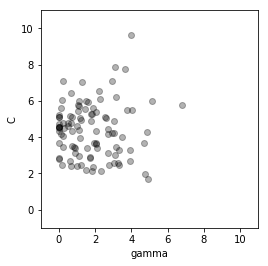

AUC for particle - 1 is 0.5785743050552953  At (gamma, c):  [1.17325277 3.94958867] .. Time =  0.3729720115661621
AUC for particle - 2 is 0.6204179695793454  At (gamma, c):  [0.12319295 5.5946664 ] .. Time =  0.253004789352417
AUC for particle - 3 is 0.5123483249964451  At (gamma, c):  [3.11334652 3.02421748] .. Time =  0.41298818588256836
AUC for particle - 4 is 0.5827271310901389  At (gamma, c):  [0.64712072 4.77029981] .. Time =  0.3303546905517578
AUC for particle - 5 is 0.5410293945451632  At (gamma, c):  [2.02431968 3.61802151] .. Time =  0.39890336990356445
AUC for particle - 6 is 0.5822884734164199  At (gamma, c):  [0.61403815 5.19465316] .. Time =  0.3730199337005615
AUC for particle - 7 is 0.6003154835576056  At (gamma, c):  [0.21530849 7.07670007] .. Time =  0.3149878978729248
AUC for particle - 8 is 0.6260023478570774  At (gamma, c):  [0.10626693 4.15073076] .. Time =  0.24797749519348145
AUC for particle - 9 is 0.5411029714367325  At (gamma, c):  [2.06079822 5.3791053 ] ..

AUC for particle - 72 is 0.5990592264257922  At (gamma, c):  [0.23172498 4.8056343 ] .. Time =  0.29300451278686523
AUC for particle - 73 is 0.5314846948220681  At (gamma, c):  [2.21988134 6.52884452] .. Time =  0.41899943351745605
AUC for particle - 74 is 0.5123655658806815  At (gamma, c):  [3.01342597 4.87516599] .. Time =  0.4180006980895996
AUC for particle - 75 is 0.5822977678324739  At (gamma, c):  [0.60277998 2.67425644] .. Time =  0.34000158309936523
AUC for particle - 76 is 0.5774813685294652  At (gamma, c):  [1.20079903 2.44782516] .. Time =  0.3820021152496338
AUC for particle - 77 is 0.5039876826077379  At (gamma, c):  [4.93847213 1.68895581] .. Time =  0.419999361038208
AUC for particle - 78 is 0.5807597369841689  At (gamma, c):  [0.87535134 3.14311326] .. Time =  0.36798667907714844
AUC for particle - 79 is 0.5798161967774238  At (gamma, c):  [1.0957631  2.96755012] .. Time =  0.380002498626709
AUC for particle - 80 is 0.5357764706705949  At (gamma, c):  [1.88510004 2.372

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


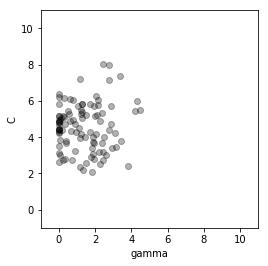

AUC for particle - 1 is 0.5791636265859492  At (gamma, c):  [0.91495178 4.27980934] .. Time =  0.3669888973236084
AUC for particle - 2 is 0.7688242404999474  At (gamma, c):  [1.0000000e-04 5.8230895e+00] .. Time =  0.1390073299407959
AUC for particle - 3 is 0.5398024541799796  At (gamma, c):  [1.92630245 3.70151307] .. Time =  0.39800381660461426
AUC for particle - 4 is 0.6017402473257786  At (gamma, c):  [0.20785675 5.19292213] .. Time =  0.2919940948486328
AUC for particle - 5 is 0.578372763641212  At (gamma, c):  [1.17570038 3.97718442] .. Time =  0.3840005397796631
AUC for particle - 6 is 0.5872737096155479  At (gamma, c):  [0.49629897 5.45730528] .. Time =  0.3330063819885254
AUC for particle - 7 is 0.7690798218178699  At (gamma, c):  [1.00000000e-04 6.19286997e+00] .. Time =  0.14500856399536133
AUC for particle - 8 is 0.7663657924415652  At (gamma, c):  [1.00000000e-04 4.83071157e+00] .. Time =  0.15300893783569336
AUC for particle - 9 is 0.5772730741657696  At (gamma, c):  [1.1

AUC for particle - 73 is 0.5409454130674395  At (gamma, c):  [2.04309543 6.30005991] .. Time =  0.41298699378967285
AUC for particle - 74 is 0.5400892932548159  At (gamma, c):  [2.39771036 5.3414799 ] .. Time =  0.3990025520324707
AUC for particle - 75 is 0.6447732458623913  At (gamma, c):  [0.0646359  3.00155578] .. Time =  0.2559943199157715
AUC for particle - 76 is 0.5810998102700485  At (gamma, c):  [1.13504612 2.36532878] .. Time =  0.38100099563598633
AUC for particle - 77 is 0.5384542398879292  At (gamma, c):  [2.4201186  2.74022572] .. Time =  0.4120020866394043
AUC for particle - 78 is 0.5902927835581119  At (gamma, c):  [0.36981507 3.66087098] .. Time =  0.3159911632537842
AUC for particle - 79 is 0.5817004527878452  At (gamma, c):  [0.73227626 2.75677234] .. Time =  0.3739912509918213
AUC for particle - 80 is 0.5396625801061937  At (gamma, c):  [1.79176339 2.88726621] .. Time =  0.40600037574768066
AUC for particle - 81 is 0.5823034277050066  At (gamma, c):  [0.60412301 6.08

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


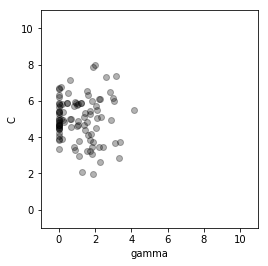

AUC for particle - 1 is 0.5822618431278674  At (gamma, c):  [0.60416927 5.01261888] .. Time =  0.329974889755249
AUC for particle - 2 is 0.7692095121621004  At (gamma, c):  [1.00000000e-04 6.30180939e+00] .. Time =  0.14500808715820312
AUC for particle - 3 is 0.5824557884041309  At (gamma, c):  [0.6731267  4.99511386] .. Time =  0.34798765182495117
AUC for particle - 4 is 0.7689010455376608  At (gamma, c):  [1.0000000e-04 5.8747145e+00] .. Time =  0.14401030540466309
AUC for particle - 5 is 0.581105200819458  At (gamma, c):  [1.12016172 3.77718417] .. Time =  0.3879976272583008
AUC for particle - 6 is 0.5882971750322293  At (gamma, c):  [0.44972251 5.90008016] .. Time =  0.32700014114379883
AUC for particle - 7 is 0.7690802436476277  At (gamma, c):  [1.00000000e-04 6.22350989e+00] .. Time =  0.1460096836090088
AUC for particle - 8 is 0.7678842686850649  At (gamma, c):  [1.00000000e-04 5.36866205e+00] .. Time =  0.15101099014282227
AUC for particle - 9 is 0.5834742834405208  At (gamma, 

AUC for particle - 71 is 0.512359424318788  At (gamma, c):  [3.05173642 6.00992063] .. Time =  0.41699957847595215
AUC for particle - 72 is 0.7664484010311924  At (gamma, c):  [1.00000000e-04 4.56005355e+00] .. Time =  0.14001059532165527
AUC for particle - 73 is 0.5620842713530626  At (gamma, c):  [1.54445873 6.54340622] .. Time =  0.40400099754333496
AUC for particle - 74 is 0.5317007575264965  At (gamma, c):  [2.2156871  6.11511008] .. Time =  0.41300177574157715
AUC for particle - 75 is 0.7656535217710091  At (gamma, c):  [1.00000000e-04 3.36557885e+00] .. Time =  0.14400935173034668
AUC for particle - 76 is 0.583483866195386  At (gamma, c):  [0.83581785 3.43522203] .. Time =  0.36002230644226074
AUC for particle - 77 is 0.5628628725989896  At (gamma, c):  [1.52869094 3.22491325] .. Time =  0.3859877586364746
AUC for particle - 78 is 0.7666163597227428  At (gamma, c):  [1.00000000e-04 4.94005227e+00] .. Time =  0.14501214027404785
AUC for particle - 79 is 0.6058946355225334  At (ga

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 7 is [1.00000000e-04 6.73668869e+00] with AUC: 0.76934337288356
32.299949407577515


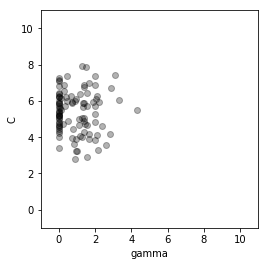

AUC for particle - 1 is 0.5912394294473161  At (gamma, c):  [0.35644632 5.72836273] .. Time =  0.31198930740356445
AUC for particle - 2 is 0.7691985909672076  At (gamma, c):  [1.00000000e-04 6.82182748e+00] .. Time =  0.14699459075927734
AUC for particle - 3 is 0.6210446825169466  At (gamma, c):  [0.12098255 5.47585746] .. Time =  0.26500701904296875
AUC for particle - 4 is 0.7692572171534967  At (gamma, c):  [1.00000000e-04 6.39657743e+00] .. Time =  0.14200758934020996
AUC for particle - 5 is 0.5818141848454474  At (gamma, c):  [0.94981306 3.91019645] .. Time =  0.3770010471343994
AUC for particle - 6 is 0.5916642387913972  At (gamma, c):  [0.30302522 6.53165541] .. Time =  0.30802297592163086
AUC for particle - 7 is 0.7692137058189146  At (gamma, c):  [1.00000000e-04 6.28573909e+00] .. Time =  0.14001059532165527
AUC for particle - 8 is 0.7689435934935216  At (gamma, c):  [1.00000000e-04 5.90310753e+00] .. Time =  0.14100933074951172
AUC for particle - 9 is 0.5882812398005913  At (g

AUC for particle - 71 is 0.5128536874016565  At (gamma, c):  [3.3145041 6.0591331] .. Time =  0.42100071907043457
AUC for particle - 72 is 0.7662911155683295  At (gamma, c):  [1.00000000e-04 4.44860027e+00] .. Time =  0.13501214981079102
AUC for particle - 73 is 0.5696955363908459  At (gamma, c):  [1.369324   6.78332859] .. Time =  0.3870537281036377
AUC for particle - 74 is 0.5485692666472305  At (gamma, c):  [1.6663447  6.97460257] .. Time =  0.39800214767456055
AUC for particle - 75 is 0.7658910439567131  At (gamma, c):  [1.0000000e-04 3.4014522e+00] .. Time =  0.1439971923828125
AUC for particle - 76 is 0.5817769388312667  At (gamma, c):  [0.71373378 3.93113095] .. Time =  0.356003999710083
AUC for particle - 77 is 0.5820108235860459  At (gamma, c):  [0.99672354 3.25751934] .. Time =  0.37398624420166016
AUC for particle - 78 is 0.7676049414994988  At (gamma, c):  [1.0000000e-04 5.2508067e+00] .. Time =  0.14100384712219238
AUC for particle - 79 is 0.7661461407727362  At (gamma, c)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 8 is [1.00000000e-04 7.28951162e+00] with AUC: 0.7698693059652868
30.80343270301819


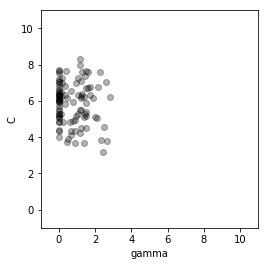

AUC for particle - 1 is 0.5915028180799645  At (gamma, c):  [0.31964311 5.85902729] .. Time =  0.3109772205352783
AUC for particle - 2 is 0.7696583965038056  At (gamma, c):  [1.00000000e-04 7.23365412e+00] .. Time =  0.14199423789978027
AUC for particle - 3 is 0.7692065797306631  At (gamma, c):  [1.00000000e-04 6.43158735e+00] .. Time =  0.1500227451324463
AUC for particle - 4 is 0.7696123204231968  At (gamma, c):  [1.00000000e-04 7.09027586e+00] .. Time =  0.14200901985168457
AUC for particle - 5 is 0.5822655258911987  At (gamma, c):  [0.59641919 4.84432685] .. Time =  0.3289909362792969
AUC for particle - 6 is 0.59301524937304  At (gamma, c):  [0.34840778 6.81039471] .. Time =  0.3090047836303711
AUC for particle - 7 is 0.7692424657233032  At (gamma, c):  [1.00000000e-04 6.30877391e+00] .. Time =  0.14700746536254883
AUC for particle - 8 is 0.7692328713286454  At (gamma, c):  [1.00000000e-04 6.57495661e+00] .. Time =  0.154998779296875
AUC for particle - 9 is 0.6167237933165657  At (

AUC for particle - 71 is 0.5314729409796074  At (gamma, c):  [2.17516318 6.79787174] .. Time =  0.4059891700744629
AUC for particle - 72 is 0.7661964337897444  At (gamma, c):  [1.00000000e-04 4.02155132e+00] .. Time =  0.13799762725830078
AUC for particle - 73 is 0.5817212334519356  At (gamma, c):  [1.02773984 7.25425453] .. Time =  0.37398648262023926
AUC for particle - 74 is 0.5648150869589842  At (gamma, c):  [1.50143931 7.64487973] .. Time =  0.3949871063232422
AUC for particle - 75 is 0.767086467481338  At (gamma, c):  [1.00000000e-04 5.09472829e+00] .. Time =  0.1460123062133789
AUC for particle - 76 is 0.5819370524387425  At (gamma, c):  [0.68446394 4.11044601] .. Time =  0.349987268447876
AUC for particle - 77 is 0.5891007776559212  At (gamma, c):  [0.43245073 3.73409178] .. Time =  0.3200037479400635
AUC for particle - 78 is 0.7692248051412575  At (gamma, c):  [1.00000000e-04 6.37195631e+00] .. Time =  0.13999533653259277
AUC for particle - 79 is 0.7662387760746731  At (gamma,

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 9 is [1.00000000e-04 7.66784617e+00] with AUC: 0.7705564626153083
30.01635193824768


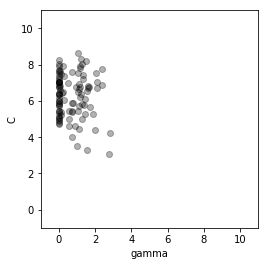

AUC for particle - 1 is 0.5944414982535166  At (gamma, c):  [0.27449612 6.0510909 ] .. Time =  0.305004358291626
AUC for particle - 2 is 0.7705589309217146  At (gamma, c):  [1.00000000e-04 7.68374063e+00] .. Time =  0.14901185035705566
AUC for particle - 3 is 0.7692398544181063  At (gamma, c):  [1.00000000e-04 6.76200794e+00] .. Time =  0.14899921417236328
AUC for particle - 4 is 0.770562064760187  At (gamma, c):  [1.00000000e-04 7.54233264e+00] .. Time =  0.14899468421936035
AUC for particle - 5 is 0.5831324150862826  At (gamma, c):  [0.57031142 4.63659858] .. Time =  0.33398890495300293
AUC for particle - 6 is 0.5942879846177099  At (gamma, c):  [0.27646729 7.3776706 ] .. Time =  0.30300378799438477
AUC for particle - 7 is 0.7692968749731932  At (gamma, c):  [1.00000000e-04 6.32360532e+00] .. Time =  0.14299488067626953
AUC for particle - 8 is 0.7695066547775772  At (gamma, c):  [1.00000000e-04 7.04687248e+00] .. Time =  0.15299701690673828
AUC for particle - 9 is 0.7695381034110951 

AUC for particle - 71 is 0.5390430667435628  At (gamma, c):  [2.38363893 6.89352143] .. Time =  0.41998744010925293
AUC for particle - 72 is 0.7663446811587037  At (gamma, c):  [1.00000000e-04 4.70718811e+00] .. Time =  0.14699387550354004
AUC for particle - 73 is 0.5814051079273567  At (gamma, c):  [1.04061759 7.52731145] .. Time =  0.37200498580932617
AUC for particle - 74 is 0.5657834934599667  At (gamma, c):  [1.47490779 8.19441158] .. Time =  0.38900089263916016
AUC for particle - 75 is 0.7674228926459237  At (gamma, c):  [1.0000000e-04 5.1645747e+00] .. Time =  0.1460111141204834
AUC for particle - 76 is 0.5817769388312667  At (gamma, c):  [0.71445032 4.00444943] .. Time =  0.35500288009643555
AUC for particle - 77 is 0.7669970581935971  At (gamma, c):  [1.00000000e-04 5.04220686e+00] .. Time =  0.14999699592590332
AUC for particle - 78 is 0.7692787269865313  At (gamma, c):  [1.00000000e-04 6.97072112e+00] .. Time =  0.15301108360290527
AUC for particle - 79 is 0.7669874637989391

In [90]:
start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)
    
    for i in range(n_particles):
        start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        stop2 = time()
        print("AUC for particle -", i+1,"is", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i], ".. Time = ", stop2 - start2)
        
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
        
    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:", fitness_function(gbest_position_cadidate))
    
   # if(gbest_fitness_value < gbest_fitness_value_cadidate):
    #    gbest_fitness_value = gbest_fitness_value_cadidate
     #   gbest_position = gbest_position_cadidate
    #print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))
    
    for i in range(n_particles):
        new_velocity = khi*(velocity_vector[i] + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i]))
        new_velocity = eval_velocity(new_velocity)
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])
    
    iteration = iteration + 1
    stop1 = time()
    sec = stop1-start1
    print(sec)
stop = time()
print(stop - start)
